# <center> Peer Assignment for the course "Supervised Machine Learning: Regression"

## <center> Author: Yulia Shutko

### **Context**
The dataset for this project originates from the UCI Machine Learning Repository. There are similar datasets on Kaggle but this is more comprehensive. It serves to show a basic trend in the house pricing in terms of its location, the area of construction, its interior, etc.

### **Content**
The dataset contains 21613x22 data fields. Column names are self-explanatory.

### **Inspiration**
What are the busiest times of the year to visit Kansas? By how much do prices spike?
Is there a general upward trend of prices and on what factors contribute the most?
Exploratory Data Analysis
Price analysis by area based on Lat and Long it

### **Column Names**
**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartment interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### **EDA**

In [1]:
# import all necessary libraries 
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Load our file to data frame

filepath = "C:/Users\Yulia/Desktop/Coursera_Courses/05_IBM Machine Learning/02_Supervised ML_Regression/Peer Assignment/kc_final.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Initial exploration

df.shape

(21613, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
duplicates = df[df.duplicated()]
duplicates

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
# Initial drop of unnecessary columns

df = df.drop (["Unnamed: 0","id", "zipcode","date", "lat", "long"], axis =1 )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [7]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Checking out types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [9]:
#  Set all necessary columns to "float type", because later units of these columns will be converted to SI unit system
df[["sqft_living", "sqft_lot","sqft_living15", "sqft_lot15","sqft_above", "sqft_basement"]] = df[["sqft_living", "sqft_lot","sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"]].astype("float")

In [10]:
# Converting to SI system
df["sqft_living"] = df["sqft_living"]/10.764

df["sqft_lot"] = df["sqft_lot"]/10.764

df["sqft_living15t"] = df["sqft_living15"]/10.764

df["sqft_lot15"] = df["sqft_lot15"]/10.764

df["sqft_above"] = df["sqft_above"]/10.764

df["sqft_basement"] = df["sqft_basement"]/10.764

df["yr_built"] = 2021-df["yr_built"]


df.rename(columns={'sqft_living':'area_qm.m', 'sqft_lot':'lot_qm','sqft_living15':'living15_qm','sqft_lot15':'lot15_qm','sqft_above':'above_qm', 'sqft_basement':'basement_qm', 'yr_built':'house_age'}, inplace=True)

df.head()

,price,bedrooms,bathrooms,area_qm.m,lot_qm,floors,waterfront,view,condition,grade,above_qm,basement_qm,house_age,yr_renovated,living15_qm,lot15_qm,sqft_living15t
0,221900.0,3,1.00,109.624675,524.897808,1.0,0,0,3,7,109.624675,0.000000,66,0,1340.0,524.897808,124.489038
1,538000.0,3,2.25,238.758826,672.798216,2.0,0,0,3,7,201.597919,37.160907,70,1991,1690.0,709.680416,157.004831
2,180000.0,2,1.00,71.534745,929.022668,1.0,0,0,3,6,71.534745,0.000000,88,0,2720.0,748.978075,252.694166
3,604000.0,4,3.00,182.088443,464.511334,1.0,0,0,5,7,97.547380,84.541063,56,0,1360.0,464.511334,126.347083
4,510000.0,3,2.00,156.075808,750.650316,1.0,0,0,3,8,156.075808,0.000000,34,0,1800.0,697.045708,167.224080


In [11]:
df.describe()

,price,bedrooms,bathrooms,area_qm.m,lot_qm,floors,waterfront,view,condition,grade,above_qm,basement_qm,house_age,yr_renovated,living15_qm,lot15_qm,sqft_living15t
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,193.227400,1403.471532,1.494309,0.007542,0.234303,3.409430,7.656873,166.145549,27.081851,49.994864,84.402258,1986.552492,1186.218474,184.555230
std,3.671272e+05,0.930062,0.770163,85.325241,3848.059412,0.539989,0.086517,0.766318,0.650743,1.175459,76.931529,41.116225,29.373411,401.679240,685.391304,2536.620181,63.674406
min,7.500000e+04,0.000000,0.000000,26.941657,48.309179,1.000000,0.000000,0.000000,1.000000,1.000000,26.941657,0.000000,6.000000,0.000000,399.000000,60.479376,37.068004
25%,3.219500e+05,3.000000,1.750000,132.571535,468.227425,1.000000,0.000000,0.000000,3.000000,7.000000,110.553698,0.000000,24.000000,0.000000,1490.000000,473.801561,138.424378
50%,4.500000e+05,3.000000,2.250000,177.443330,707.729469,1.500000,0.000000,0.000000,3.000000,7.000000,144.927536,0.000000,46.000000,0.000000,1840.000000,707.915273,170.940171
75%,6.450000e+05,4.000000,2.500000,236.900780,992.939428,2.000000,0.000000,0.000000,4.000000,8.000000,205.314010,52.025269,70.000000,0.000000,2360.000000,936.733556,219.249350
max,7.700000e+06,33.000000,8.000000,1257.896693,153414.994426,3.500000,1.000000,4.000000,5.000000,13.000000,874.210331,447.788926,121.000000,2015.000000,6210.000000,80936.454849,576.923077


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='area_qm.m', ylabel='price'>,
        <AxesSubplot:xlabel='lot_qm', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='above_qm', ylabel='price'>,
        <AxesSubplot:xlabel='basement_qm', ylabel='price'>,
        <AxesSubplot:xlabel='house_age', ylabel='price'>,
        <AxesSubplot:xlabel='living15_qm', ylabel='price'>,
        <AxesSubplot:xlabel='lot15_qm', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15t', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlab

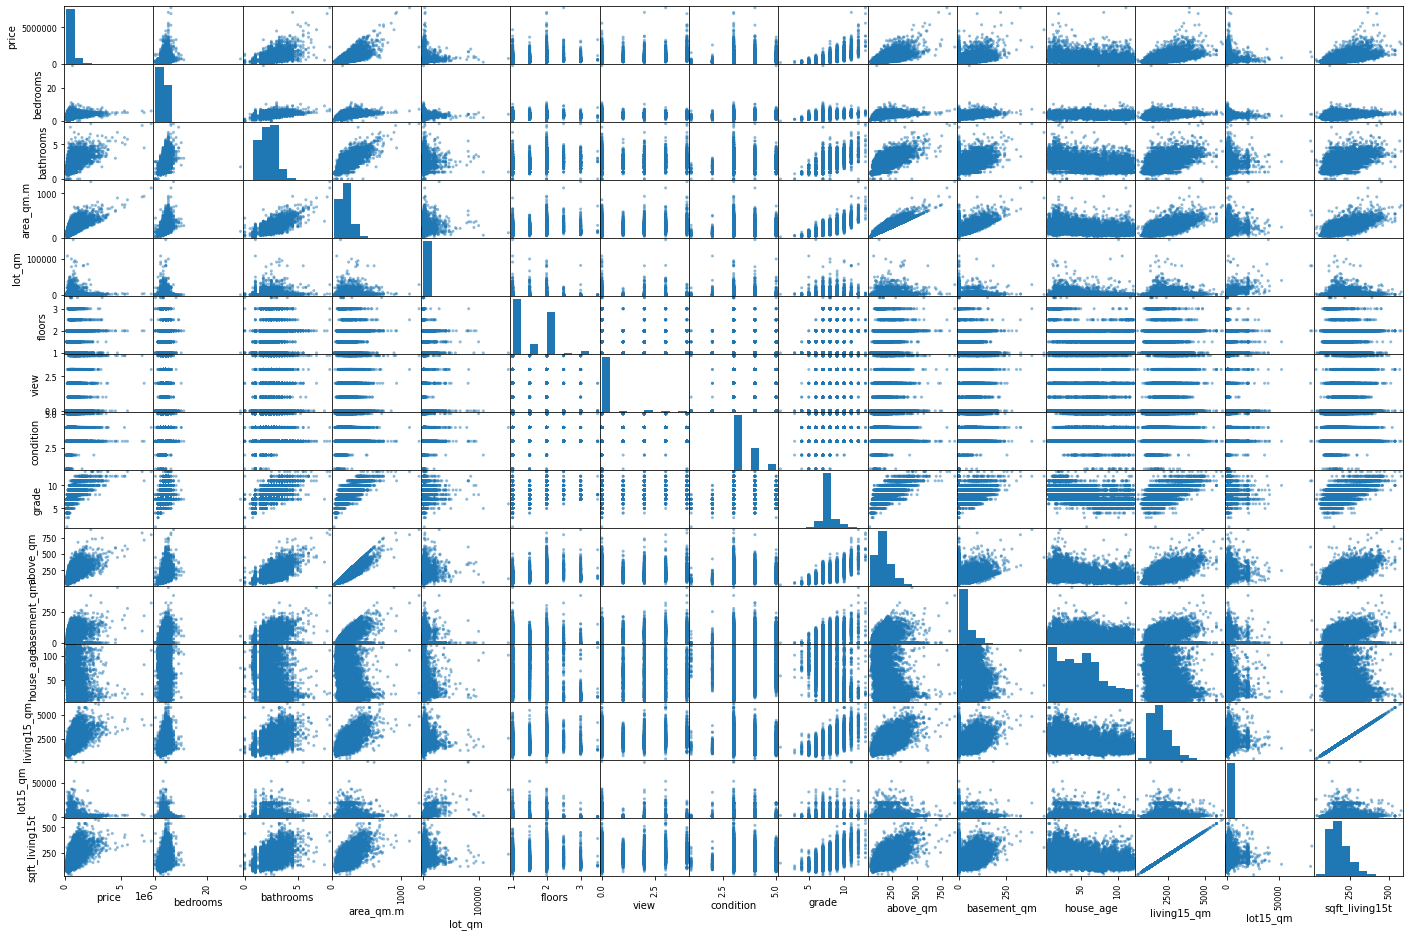

In [12]:
attributes = ['price', 'bedrooms', 'bathrooms', 'area_qm.m', 'lot_qm', 'floors',
       'view', 'condition', 'grade', 'above_qm', 'basement_qm', 'house_age',
       'living15_qm', 'lot15_qm', 'sqft_living15t']
scatter_matrix(df[attributes], figsize=(24, 16))

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'area_qm.m', 'lot_qm', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'above_qm', 'basement_qm',
       'house_age', 'yr_renovated', 'living15_qm', 'lot15_qm',
       'sqft_living15t'],
      dtype='object')

In [14]:
#df = df.drop(['floors','view', 'condition', 'house_age', 'lat', 'long','lot15_qm','grade','lot_qm'], axis =1)
#df = df.drop(['lat', 'long'], axis =1)
#df

In [15]:
corr_matrix = df.corr()
corr_matrix 

,price,bedrooms,bathrooms,area_qm.m,lot_qm,floors,waterfront,view,condition,grade,above_qm,basement_qm,house_age,yr_renovated,living15_qm,lot15_qm,sqft_living15t
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.054012,0.126434,0.585379,0.082447,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.154178,0.018841,0.391638,0.029244,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.506019,0.050739,0.568634,0.087175,0.568634
area_qm.m,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.318049,0.055363,0.756420,0.183286,0.756420
lot_qm,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.053080,0.007644,0.144608,0.718557,0.144608
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.489319,0.006338,0.279885,-0.011269,0.279885
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.026161,0.092885,0.086463,0.030703,0.086463
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.053440,0.103917,0.280439,0.072575,0.280439
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.361417,-0.060618,-0.092824,-0.003406,-0.092824
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.446963,0.014414,0.713202,0.119248,0.713202


<AxesSubplot:>

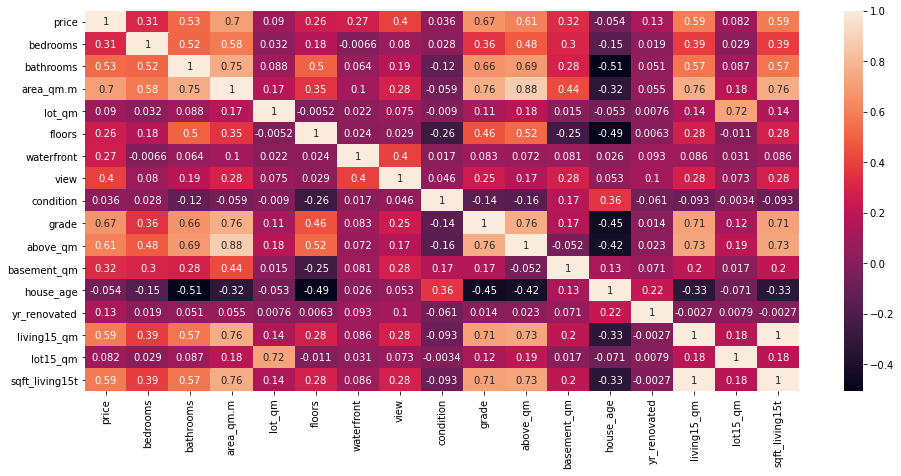

In [16]:
#resizeplot(16,7)

plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

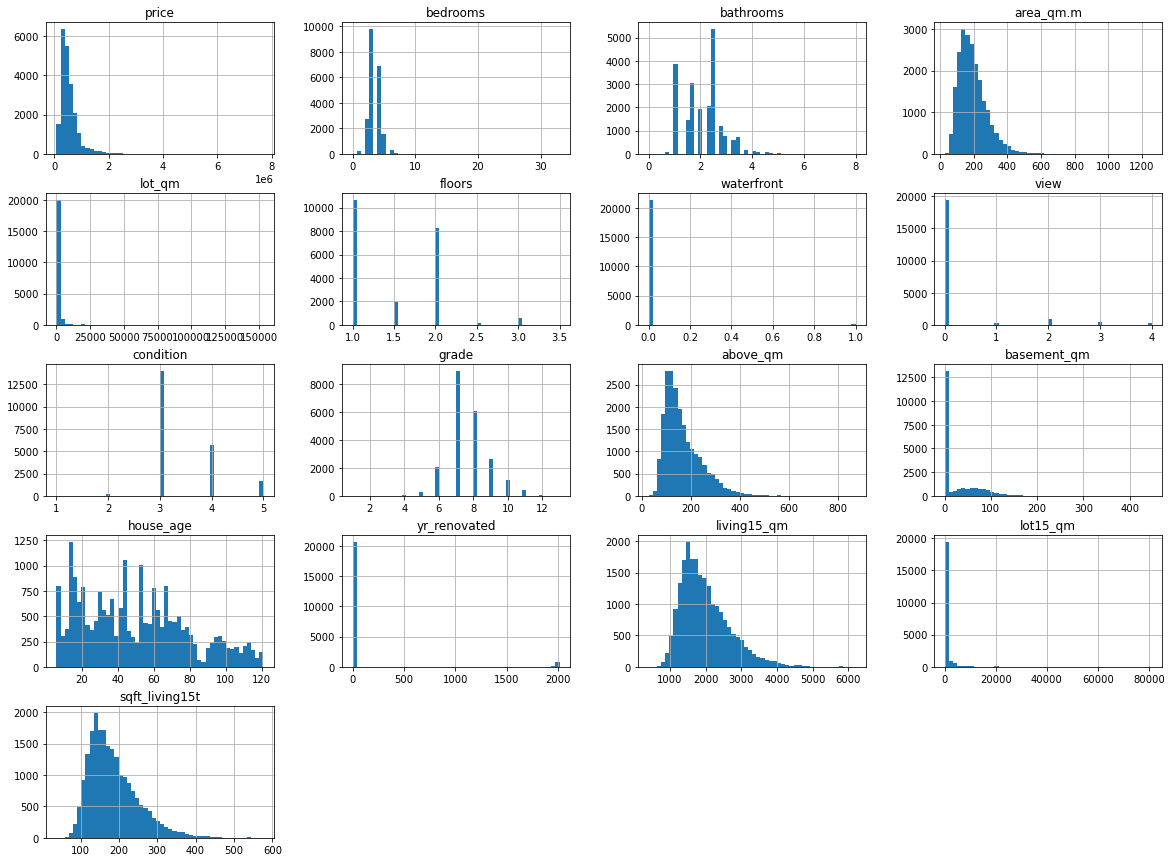

In [17]:
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
house_age = df["house_age"].loc[(df['house_age'] >= 5) & (df['house_age'] <= 80)]

In [19]:
house_age.head()

0    66
1    70
3    56
4    34
5    20
Name: house_age, dtype: int64

## **Regressions**

In [20]:
house_age. value_counts(sort = True)

7     559
15    454
16    450
17    433
18    422
     ... 
75    126
39    105
50    104
76     95
6      38
Name: house_age, Length: 75, dtype: int64

### **Simple linear regression without scaler**

In [21]:
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline

In [22]:
#Split data set to X and y
y = df["price"]
X = df.drop("price", axis = 1)
s = StandardScaler()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [24]:
LR = LinearRegression()
X_train_s= s.fit_transform(X_train)
LR = LR.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_predict = LR.predict(X_test_s)


In [25]:
score_LR = LR.score(X_test_s, y_test)
print(score_LR)

0.6527436244894339


In [26]:
score_LR_test = LR.score(X_train_s, y_train)
print(score_LR)

0.6527436244894339


In [27]:
LR.coef_

array([-3.63641428e+04,  3.40609429e+04, -4.11747147e+17, -1.44647642e+03,
        1.45385607e+04,  4.55195829e+04,  3.36194745e+04,  9.83797245e+03,
        1.38949634e+05,  3.73655447e+17,  1.98112250e+17,  1.03568283e+05,
        5.17467041e+03,  1.66243004e+16, -1.34070317e+04, -1.66243004e+16])

In [28]:
LR.intercept_

537724.8904619286

In [29]:
r2_linear = r2_score(y_test, y_predict)
r2_linear

0.6527436244894339

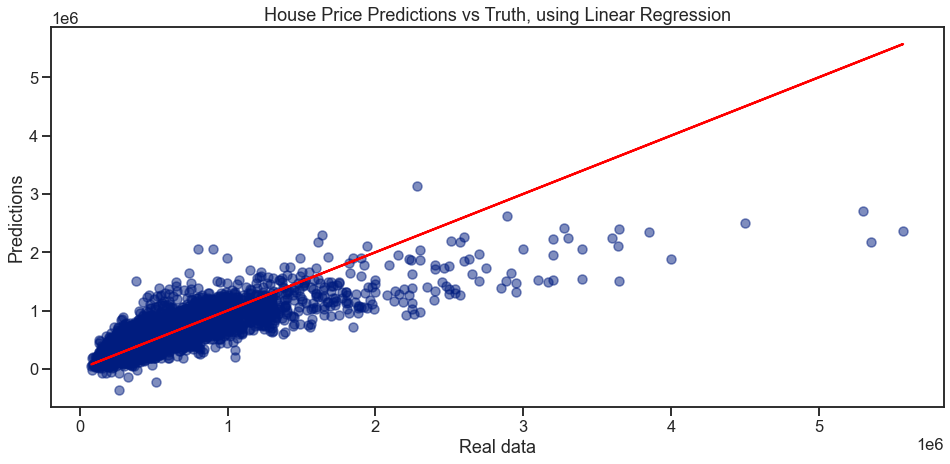

In [30]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test,y_predict, alpha=.5)

ax.plot(y_test,y_test,color='red')

ax.set(xlabel='Real data', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Linear Regression');



In [31]:
r2_LR = r2_score(y_test, y_predict)
print(r2_LR)

0.6527436244894339


### **Simple linear regression with standart scaler and cross validation** 

#### Cross validation without stander scaler

In [32]:
kf = KFold (shuffle = True, random_state = 42, n_splits = 4)

In [33]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  4  5  7  8  9 10 11 12] 16209
Test index: [ 0  3  6 17 19 31 34 35 41 42] 5404

Train index: [ 0  1  2  3  4  6  9 10 11 12] 16210
Test index: [ 5  7  8 14 15 20 23 27 29 30] 5403

Train index: [ 0  3  5  6  7  8  9 11 13 14] 16210
Test index: [ 1  2  4 10 12 18 21 22 26 28] 5403

Train index: [ 0  1  2  3  4  5  6  7  8 10] 16210
Test index: [ 9 11 13 16 24 25 40 53 55 60] 5403



In [34]:
scores1 = []
lr_cv = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr_cv.fit(X_train, y_train)
        
    y_pred = lr_cv.predict(X_test)

    score1 = r2_score(y_test.values, y_pred)
    
    scores1.append(score1)
    
scores1

[0.6589788662808868, 0.63047856769891, 0.6709132416187445, 0.6511055977726199]

#### Cross validation with standart scaler

In [35]:
scores2 = []

lr_cv_s = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr_cv_s.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr_cv_s.predict(X_test_s)

    score2 = r2_score(y_test.values, y_pred)
    
    scores2.append(score2)

In [36]:
scores2

[0.6589788662808822, 0.630478567698897, 0.6709132416187354, 0.6510589904421277]

In [37]:
scores2=np.mean(scores2)
scores2

0.6528574165101606

In [38]:
 estimator = Pipeline([
          ("scaler", s),      
          ("linear_regression", lr_cv_s)])

In [39]:
predictions = cross_val_predict(estimator, X, y, cv = kf)

In [40]:
r2_score(y, predictions)

0.6522352419622846

In [41]:
lr_cv_s.coef_, lr_cv_s. intercept_

(array([-3.65214334e+04,  3.63918864e+04, -1.71171411e+17, -6.40266902e+02,
         1.21719069e+04,  5.29561678e+04,  3.39642220e+04,  1.30922688e+04,
         1.40418329e+05,  1.54104337e+17,  8.22992684e+16,  1.05974294e+05,
         3.17163300e+03, -1.69699548e+15, -1.44412724e+04,  1.69699548e+15]),
 541293.4336916765)

### **Linear regression with polynomial features**

#### Linear regression with polynomial features without cross-validation 

In [42]:
lr_pf =LinearRegression()
s = StandardScaler()
pf = PolynomialFeatures(degree=2, include_bias=False)

In [43]:
X_pf = pf.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

In [45]:
X_train_pf = s.fit_transform(X_train)

In [46]:
lr_pf = lr_pf.fit(X_train_pf,y_train)
X_test_pf = s.transform(X_test)
y_train_pf = lr_pf.predict(X_train_pf)
y_pred = lr_pf.predict(X_test_pf)

In [47]:
r2_score(y_test,y_pred)

0.7051703379524421

In [48]:
scores = lr_pf.score(X_train_pf, y_train)
scores

0.7588124148231021

In [49]:
scores = lr_pf.score(X_test_pf, y_test)
scores

0.7051703379524421

In [50]:
lr_pf.coef_, lr_pf.intercept_

(array([-6.60329650e+04,  3.46429745e+03,  1.29548767e+17, -4.21180389e+04,
        -2.95817574e+04, -5.57645446e+14, -1.06250796e+05, -5.61580510e+04,
        -4.58540308e+04, -1.17563904e+17, -6.23324236e+16, -2.01262000e+05,
        -7.06017250e+05, -2.89373486e+16,  1.60943000e+05,  2.89373486e+16,
         7.11200000e+03,  7.76400000e+03,  2.39239421e+17,  3.80365000e+04,
         3.48280000e+04,  7.40700000e+03, -1.47980000e+04, -2.05600000e+03,
         2.82800000e+03, -2.05915292e+17, -9.18535468e+16,  5.35360000e+04,
        -1.58372500e+04,  1.07859319e+16,  1.22100000e+03, -1.07859319e+16,
        -2.63115000e+04, -4.22796123e+16, -5.43670000e+04, -5.36675000e+04,
        -1.20850000e+04,  3.50520000e+04, -1.77535000e+04,  1.08735000e+05,
         3.66422437e+16,  1.35758094e+16, -3.16800000e+04, -2.86420000e+04,
        -7.79918103e+15,  3.11550000e+04,  7.79918103e+15,  1.08197760e+17,
         2.33687329e+16, -4.04399776e+16, -2.05332337e+17, -1.05247518e+17,
         1.3

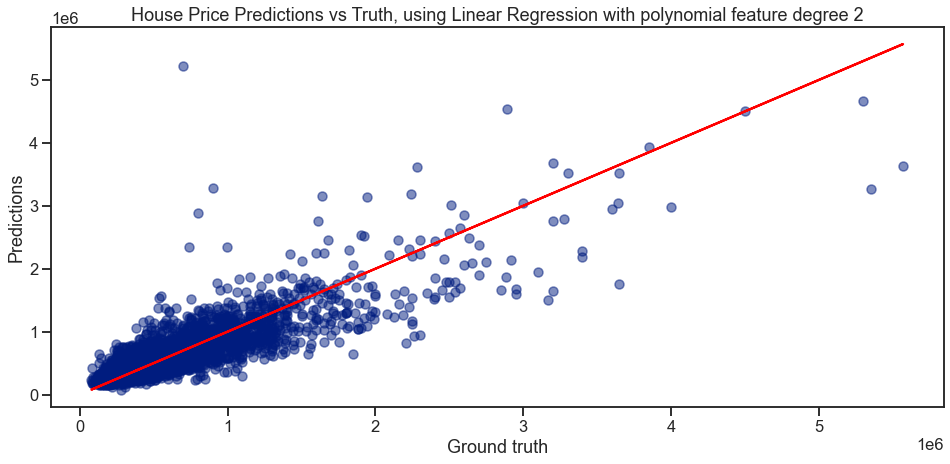

In [51]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test,y_pred, alpha=.5)
ax.plot(y_test,y_test,color='red')
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Linear Regression with polynomial feature degree 2');

3d degree

In [52]:
lr_pf1 =LinearRegression()
s = StandardScaler()
pf1 = PolynomialFeatures(degree=3, include_bias=False)

In [53]:
X_pf1 = pf1.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_pf1, y, test_size=0.3, 
                                                    random_state=42)

In [55]:
X_train_pf1 = s.fit_transform(X_train)

In [56]:
lr_pf1 = lr_pf1.fit(X_train_pf1,y_train)
X_test_pf1 = s.transform(X_test)
y_train_pf1 = lr_pf1.predict(X_train_pf1)
y_pred1 = lr_pf1.predict(X_test_pf1)

In [57]:
r2_score(y_test,y_pred1)

-2.5884692932652738

In [58]:
scores = lr_pf1.score(X_train_pf1, y_train)
scores

0.8096388117748481

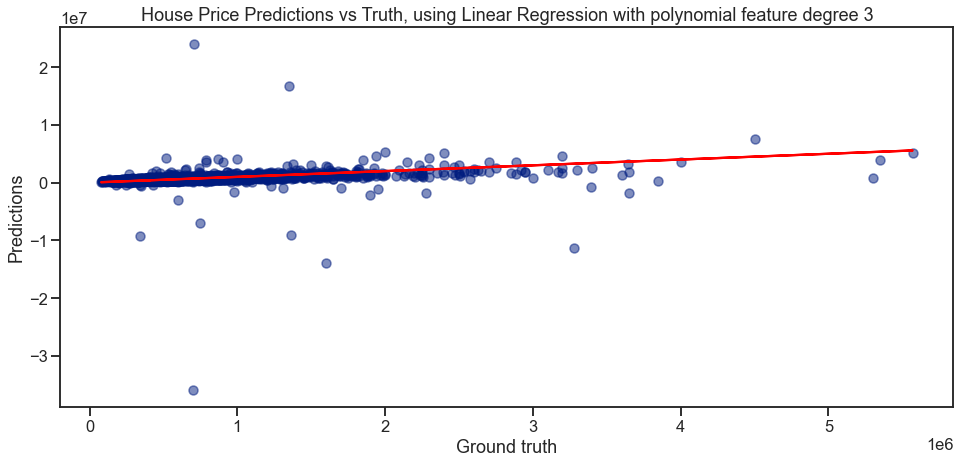

In [59]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test,y_pred1, alpha=.5)
ax.plot(y_test,y_test,color='red')
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Linear Regression with polynomial feature degree 3');

4th degree

In [60]:
lr_pf =LinearRegression()
s = StandardScaler()
pf2 = PolynomialFeatures(degree=4, include_bias=False)

In [61]:
X_pf2 = pf2.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_pf2, y, test_size=0.3, 
                                                    random_state=42)

In [63]:
X_train_pf2 = s.fit_transform(X_train)

In [64]:
lr_pf2 = lr_pf.fit(X_train_pf2,y_train)
X_test_pf2 = s.transform(X_test)
y_train_pf2 = lr_pf.predict(X_train_pf2)
y_pred2 = lr_pf.predict(X_test_pf2)

In [65]:
r2_score(y_test,y_pred2)

-4.941090125130182e+21

In [66]:
scores = lr_pf.score(X_train_pf2, y_train)
scores

0.87170429500464

In [67]:
scores = lr_pf2.score(X_test_pf2, y_test)
scores

-4.941090125130182e+21

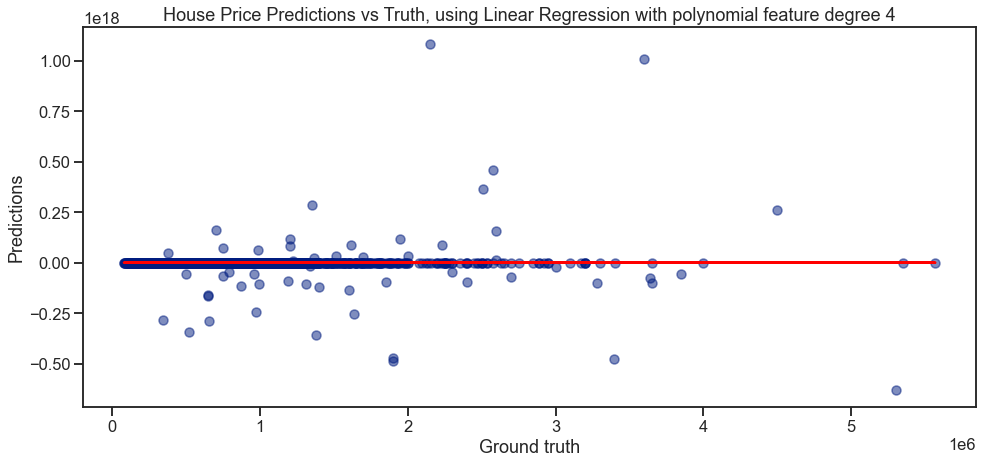

In [68]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test,y_pred2, alpha=.5)
ax.plot(y_test,y_test,color='red')
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Linear Regression with polynomial feature degree 4');

#### Linear regression with polynomial features and cross validation

In [69]:
 estimator = Pipeline([
          ("polynomial_features", pf),("scaler", s),      
          ("linear_regression", LR)])

In [70]:
predictions = cross_val_predict(estimator, X, y, cv = kf)

In [71]:
r2_score(y,predictions)

0.7294170644581284

In [72]:
scores3 = []

lr_cv_s1 = LinearRegression()
s = StandardScaler()
X_pf = pd.DataFrame(X_pf)
for train_index, test_index in kf.split(X_pf):
    X_train, X_test, y_train, y_test = (X_pf.iloc[train_index, :], 
                                        X_pf.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr_cv_s1.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr_cv_s1.predict(X_test_s)

    score3 = r2_score(y_test.values, y_pred)
    
    scores3.append(score3)

In [73]:
scores3

[0.7050985713425744,
 0.7466804493916874,
 0.7403598582785109,
 0.7267936519851499]

In [74]:
 estimator = Pipeline([
          ("polynomial_features", pf),("scaler", s),      
          ("linear_regression", LR)])

In [75]:
predictions = cross_val_predict(estimator, X, y, cv = kf)

In [76]:
r2_score(y,predictions)

0.7294170644581284

In [77]:
scores3 = []

lr_cv_s1 = LinearRegression()
s = StandardScaler()
X_pf = pd.DataFrame(X_pf)
for train_index, test_index in kf.split(X_pf):
    X_train, X_test, y_train, y_test = (X_pf.iloc[train_index, :], 
                                        X_pf.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr_cv_s1.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr_cv_s1.predict(X_test_s)

    score3 = r2_score(y_test.values, y_pred)
    
    scores3.append(score3)

In [78]:
scores3

[0.7050985713425744,
 0.7466804493916874,
 0.7403598582785109,
 0.7267936519851499]

In [79]:
scores_pf = np.mean(scores3)
scores_pf

0.7297331327494807

In [80]:
pf1= pf = PolynomialFeatures(degree=3, include_bias=False)

In [81]:
 estimator = Pipeline([
          ("polynomial_features", pf1),("scaler", s),      
          ("linear_regression", LR)])

In [82]:
predictions = cross_val_predict(estimator, X, y, cv = kf)

In [83]:
r2_score(y,predictions)

-27.156898919641815

In [84]:
scores3 = []

lr_cv_s1 = LinearRegression()
s = StandardScaler()
X_pf = pd.DataFrame(X_pf)
for train_index, test_index in kf.split(X_pf):
    X_train, X_test, y_train, y_test = (X_pf.iloc[train_index, :], 
                                        X_pf.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr_cv_s1.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr_cv_s1.predict(X_test_s)

    score3 = r2_score(y_test.values, y_pred)
    
    scores3.append(score3)

In [85]:
scores3

[0.7050985713425744,
 0.7466804493916874,
 0.7403598582785109,
 0.7267936519851499]

In [106]:
#alpha = np.geomspace(0.1, 20, num = 100)

In [112]:
rr_linear = Ridge(alpha = 0.1)
rr_linear = rr_linear. fit (X_train, y_train)
y_pred_ln_rr = rr_linear. predict (X_test)

In [115]:
r2_rr_linear = r2_score(y_test, y_pred_ln_rr)
r2_rr_linear

0.7265245260141469

In [116]:
rr = Ridge(alpha=0.01)
rr = rr.fit(X_train_pf, y_train)
y_pred_rr = rr.predict(X_test_pf)

ValueError: Found input variables with inconsistent numbers of samples: [15129, 16210]

In [121]:
rr_poly= Ridge()
s = StandardScaler()
pf = PolynomialFeatures(degree=2, include_bias=False)

In [122]:
X_pf = pf.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

In [124]:
X_train_pf = s.fit_transform(X_train)

In [127]:
rr_poly = rr_poly.fit(X_train_pf,y_train)
X_test_pf = s.transform(X_test)
y_train_pf = rr_poly.predict(X_train_pf)
y_pred_rr = rr_poly.predict(X_test_pf)

In [128]:
r2_score(y_test,y_pred_rr)

0.704982885085154

In [ ]:
r2_rr_ploy = r2_score(y_test, y_pred_rr)
r2_rr_poly

### **Regularisation regressions with the Grid Search CV**

#### Linear Ridge regression

In [86]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
           ("ridge_regression", Ridge())])

params = {
    
    'ridge_regression__alpha': np.geomspace(0.1, 20, num = 1000)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [87]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'ridge_regression__alpha': array([ 0.1       ,  0.10053177,  0.10106637,  0.10160381,  0.10214411,
        0.10268728,  0.10323335,  0.10378231,  0.10433419,  0.10488901,
        0.10544678,  0.10600752,  0.10657124,  0.10713795,  0.10770768...
       17.14878396, 17.23997622, 17.33165342, 17.42381812, 17.51647294,
       17.60962046, 17.70326332, 17.79740414, 17.89204558, 17.98719029,
       18.08284095, 18.17900026, 18.27567091, 18.37285563, 18.47055715,
       18.56877822, 18.66752159, 18.76679006, 18.86658641, 18.96691345,
       19.06777399, 19.16917089, 19.27110698, 19.37358514, 19.47660825,
       19.58017921, 19.68430092, 19.78897633, 19.89420837, 20.        ])})

In [129]:
y_predict_grid = grid.predict(X)

In [130]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict_grid)

0.6537312697478272

In [131]:
grid.best_score_, grid.best_params_

(0.6528730922437228, {'ridge_regression__alpha': 20.000000000000004})

In [91]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([-3.64563630e+04,  3.51798197e+04,  7.60741551e+04, -6.84022803e+01,
        1.45317630e+04,  5.00577925e+04,  3.31691848e+04,  1.27298576e+04,
        1.40410489e+05,  6.44714370e+04,  3.72397861e+04,  1.04628223e+05,
        4.14083532e+03,  8.61293464e+03, -1.50117465e+04,  8.61293464e+03])

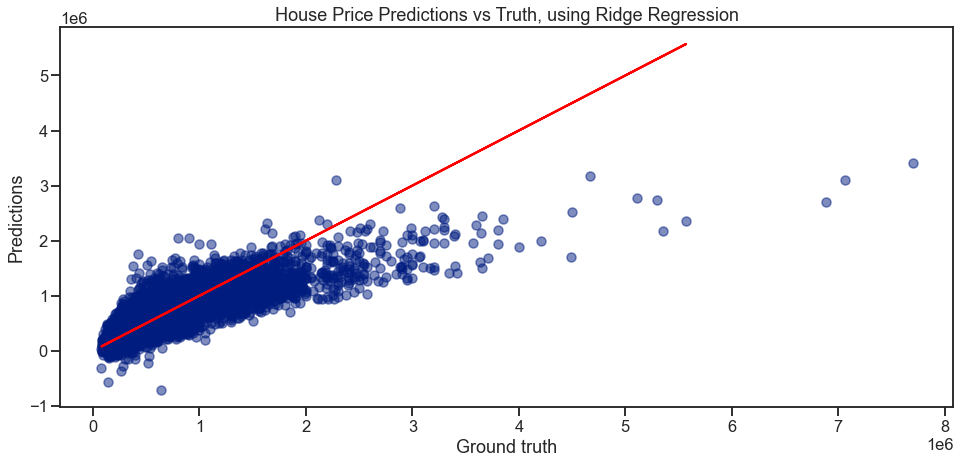

In [139]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y,y_predict_grid, alpha=.5)
ax.plot(y_test,y_test,color='red')
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Ridge Regression');

#### Ridge regression with polynomial features

In [92]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2,3],
    'ridge_regression__alpha': np.geomspace(0.1, 20, num = 100)
}

grid1 = GridSearchCV(estimator, params, cv=kf)

In [93]:
grid1.fit(X, y)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 0.1       ,  0.10549764,  0.11129751,  0.11741624,  0.12387136,
        0.13068136,  0.13786574,  0.14...
        3.24173321,  3.41995189,  3.60796839,  3.80632136,  4.01557904,
        4.23634095,  4.46923955,  4.71494206,  4.97415241,  5.24761319,
        5.53610785,  5.8404629 ,  6.16155028,  6.50028987,  6.85765214,
        7.23466087,  7.63239618,  8.05199753,  8.49466702,  8.96167288,
        9.45435302,  9.97411891, 10.52245965, 11.10094616, 11.71123575,
       12.35507684, 13.03431396, 13.75089307, 14.5068671 , 15.30440182,
  

In [134]:
y_predict_grid1 = grid1.predict(X)

In [135]:
r2_score(y, y_predict_grid1)

0.7515105250174143

In [136]:
grid1.best_score_, grid1.best_params_

(0.7308098365005897,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.1})

In [137]:
grid1.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -8.32786477e+03,  2.39989378e+04,  5.42543884e+04,
        4.32424568e+02, -4.85068207e+03,  2.51183118e+02,  1.37082356e+03,
        2.34787525e+04,  1.21452530e+05,  4.02544588e+04,  3.72707367e+04,
        7.12310714e+04, -7.59285652e+05,  2.12882351e+04, -3.36184461e+04,
        2.12882351e+04,  7.23268215e+02,  4.08993427e+03, -7.57805409e+03,
        2.73874577e+02,  5.73563186e+03,  7.43706414e+02, -1.53961332e+03,
       -1.87642677e+03, -2.97185195e+03, -4.95020402e+03, -6.46393473e+03,
        1.25568906e+04, -3.48588683e+03,  5.25229460e+03,  5.58984294e+03,
        5.25229461e+03, -5.07690180e+03,  1.16218321e+04, -1.05151221e+04,
       -1.14875693e+04,  9.76047423e+02,  4.88484359e+03, -7.34751565e+02,
        1.74082732e+04,  1.27554833e+04,  2.51407245e+02, -9.37006806e+03,
       -6.35039801e+03, -5.10553851e+03,  2.42646462e+03, -5.10553852e+03,
        3.13379866e+03, -1.21719951e+04, -2.62923969e+03,  1.13310423e+04,
       -5.93359350e+03,  

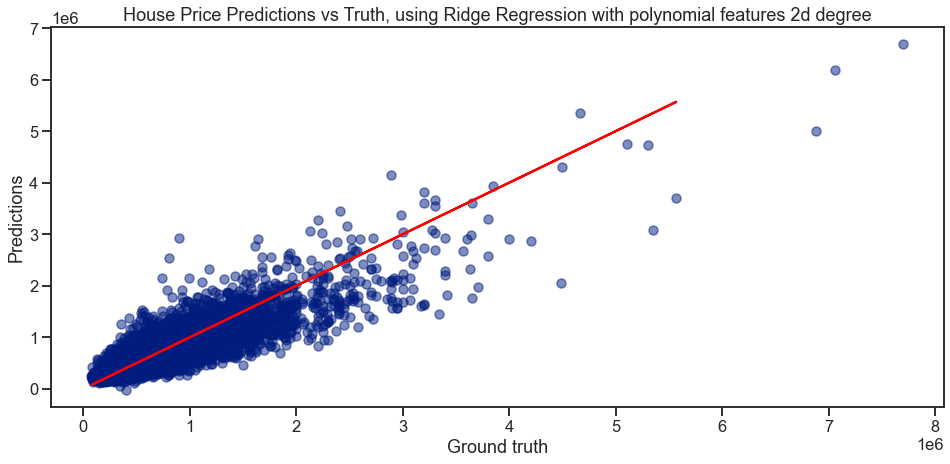

In [140]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.figure(figsize=(16,7))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y,y_predict_grid1, alpha=.5)
ax.plot(y_test,y_test,color='red')
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='House Price Predictions vs Truth, using Ridge Regression with polynomial features 2d degree');

### Lasso Regression

#### Lasso Regression without Polynomial Features

In [98]:
# alphas = np.geomspace(0.1, 20, num = 10)

In [99]:
# scores_las = []
# coefs_las = []
# for alpha in alphas:
#     las = Lasso(alpha=alpha, max_iter=1000000)
    
#     estimator = Pipeline([
#         ("scaler", s),
#         ("lasso_regression", las)])

#     predictions = cross_val_predict(estimator, X, y, cv = kf)
    
#     score = r2_score(y, predictions)
    
#     scores_las.append(score)

In [100]:
#list(zip(alphas,scores_las))

In [101]:
#plt.semilogx(alphas, scores_las);

#### Lasso Regression with Polynomial Features

In [102]:
# pf = PolynomialFeatures(degree=2)

# scores = []
# alphas = np.geomspace(0.1, 20, num = 4)
# for alpha in alphas:
#     las = Lasso(alpha=alpha, max_iter=100000)
    
#     estimator = Pipeline([
#         ("make_higher_degree", pf),("scaler", s),
#         ("lasso_regression", las)])

#     predictions = cross_val_predict(estimator, X, y, cv = kf)
    
#     score = r2_score(y, predictions)
    
#     scores.append(score)
    

In [103]:
#list(zip(alphas,scores))